<div style="vertical-align: middle;">
<img src="spurs-2014.png" align="right" style="width: 300px; border: solid 1px black;"/>
<h1>NBA Greatness According to Elo</h1>
<h2>Ryan Middleton, May 2019 (v1.0)</h2>
<hr/>
<h5>Udacity Data Analyst Nanodegree</h5>
<h5>Communicate Data Findings - Project Submission</h5>
</div>

Much is made of the idea of "greatness" in sports - and nowhere more so than in the National Basketball Association. Historically, great teams are given the benefit of the doubt in big games, compared across eras, and forever linked to their star players.

Greatness has always inspired both awe and concern about dominance of teams at the top, for instance in this "Inside the NBA" segment from 2017:
<div style="text-align: center"><iframe width="560" height="315" align="center" src="https://www.youtube.com/embed/rYO4Y2rEVJA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>

## Investigation Overview

Of course, there is a problem! Greatness is in the eye of the beholder. It may be even more impossible to prove for teams than individual players.

However, in this age of sports analytics, we can at least quantify the teams that are commonly known to be "great." Do they always outperform come playoff time? Is every champion historically "great?"

This presentation presents findings from an analysis of the best teams in the NBA's modern era, based on FiveThirtyEight's [NBA Elo ratings](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/).

## Dataset Overview

<img src="elo09_bball.jpg" align="right" style="padding-left: 20px"/>

Based on a rating system for chess players originally developed by Arpad Elo (and since adapted for many competitive games), FiveThirtyEight's Elo is a game-by-game calculation derived from (1) scoring margin and (2) where a game is played.

This investigation demonstrates that Elo allows for a more granular look at team performance over time than just win/loss record, and certainly more than gut feeling or reputation. It is also useful as a more analogous comparison of regular season vs. playoff performance.

The following analyses are based on NBA Elo ratings to May 2019, as well as historical data compiled from [Basketball Reference](https://www.basketball-reference.com/).

In [628]:
# Setup environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# for notebook
%matplotlib inline

# suppress warnings from final output
warnings.simplefilter("ignore")

# seaborn settings
sns.set_style('darkgrid')
sns.set_context('poster', font_scale=.5)

nba_modern_era_seasons = [str(i) for i in range(1977, 2019)] # modern era seasons to use for viz

nba_modern_era_season_labels = ['{}-{}'.format(int(s[-4:]) - 1, s[-2:])
    for s in nba_modern_era_seasons] # custom labels to match convential YYYY-YY season format

title_contender_min_elo = 1650 #determined threshold for "title contender" category

In [767]:
# load datasets
df_nba_team_elo = pd.read_csv('nba_team_elo.csv')
df_seasons_elo = pd.read_csv('seasons_elo.csv')
df_streaks_elo = pd.read_csv('nba_streaks_elo.csv')

# pre-process df types
df_nba_team_elo['date'] = df_nba_team_elo['date'].astype('datetime64')
df_nba_team_elo['season'] = df_nba_team_elo['season'].astype('str')
df_streaks_elo['season'] = df_streaks_elo['season'].astype('str')
df_streaks_elo['start_date'] = df_streaks_elo['start_date'].astype('datetime64')
df_streaks_elo['end_date'] = df_streaks_elo['end_date'].astype('datetime64')

<img src="sports-logos-boston-celtics.jpg" align="right" style="padding-left: 10px; width: 136px; height: 136px; display: inline;"/>

## The Boston Celtics According to Elo

Let's take the Boston Celtics (BOS) as our prime example. Boston is widely considered as one of the greatest and  most storied teams in NBA history. Looking at the per-season historical ratings allows us to see some interesting features that contribute to Boston's story. Some highlights:
- The dynasty of 1980-88, led by Larry Bird, really stands out for consistently high Elo. If not for a rivalry with the also-great Lakers, Boston probably would have won more than three titles here.

- The 2001-02 team really out-performed in the playoffs - resulting in a surprise run to the conference finals. This is a clear highlight of Boston's average years in the early 2000s.

- The 2007-08 championship team marked the biggest improvement, record-wise, in NBA history. But looking at the change in Elo makes this turnaround even more impressive. Boston became champs after hitting literally the worst rating in the league one year before.

<sub>[chart in sub-slide &#9660;]</sub>

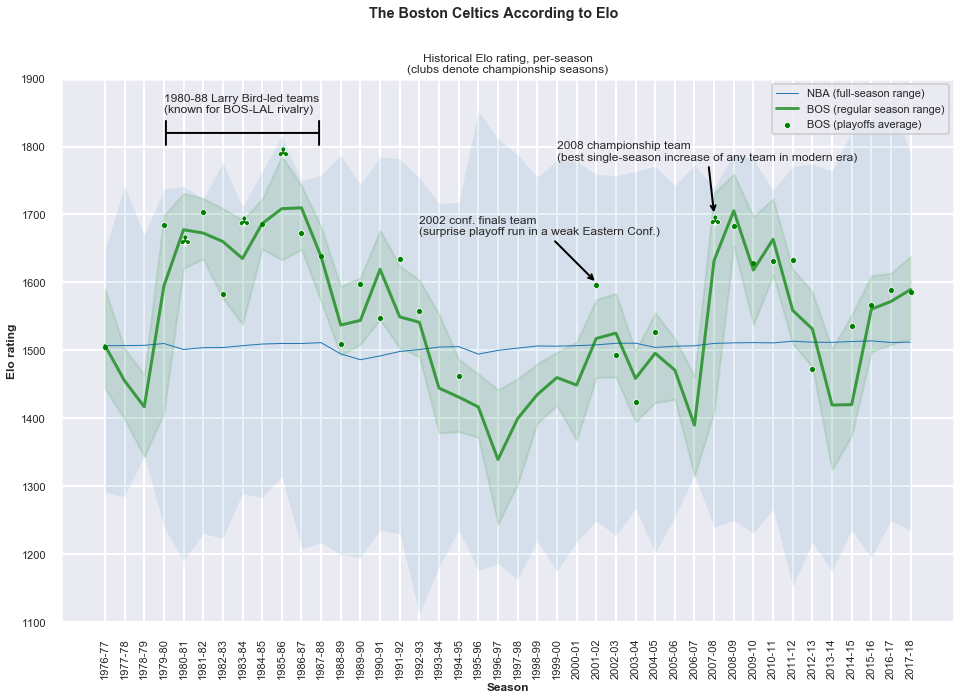

In [582]:
# Modern era full-season Elo

groupby_season_elo = df_nba_team_elo.query('season.isin({})'.format(nba_modern_era_seasons),
    engine = 'python').groupby('season')

# BOS modern era Elo, regular season and playoffs

groupby_reg_season_bos = df_nba_team_elo.query(
    'team == "BOS" and season.isin({}) and playoff.isnull()'.format(nba_modern_era_seasons),
    engine = 'python').groupby('season')

bos_champ_seasons = list(df_seasons_elo[df_seasons_elo['champion'] == 'BOS']['season'].astype('str'))

groupby_playoff_season_bos = df_nba_team_elo.query(
    'team == "BOS" and season.isin({}) and playoff.isnull() == False and season.isin({}) == False'.format(
        nba_modern_era_seasons, bos_champ_seasons), engine = 'python').groupby('season')

groupby_champ_season_bos = df_nba_team_elo.query(
    'team == "BOS" and season.isin({}) and playoff.isnull() == False'.format(bos_champ_seasons),
    engine = 'python').groupby('season')

# Plot

fig, ax = plt.subplots(figsize=(16, 10))

# Modern era full-season average, max, min
sns.lineplot(data = groupby_season_elo.mean().reset_index(),
             x='season', y='elo_post', label='NBA (full-season range)', linewidth=1, ax=ax)
ax.fill_between(nba_modern_era_seasons, groupby_season_elo['elo_post'].min(),
                groupby_season_elo['elo_post'].max(), alpha=.1)

# BOS modern era regular season average
sns.lineplot(data = groupby_reg_season_bos.mean().reset_index(),
             x='season', y='elo_post', label='BOS (regular season range)',
             color='green', alpha=.7, ax=ax)
ax.fill_between(nba_modern_era_seasons, groupby_reg_season_bos['elo_post'].min(),
                groupby_reg_season_bos['elo_post'].max(), color='green', alpha=.1)

# BOS modern era playoffs average
sns.scatterplot(data = groupby_playoff_season_bos.mean().reset_index(),
             x='season', y='elo_post', label='BOS (playoffs average)',
             marker='.', color='green', ax=ax)

# BOS modern era playoffs average (marking championship seasons)
sns.scatterplot(data = groupby_champ_season_bos.mean().reset_index(),
             x='season', y='elo_post', marker='$\clubsuit$', color='green', ax=ax)

# Style
plt.ylim(df_nba_team_elo['elo_post'].min().round(-2),
         df_nba_team_elo['elo_post'].max().round(-2))
plt.ylabel('Elo rating', fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.suptitle('The Boston Celtics According to Elo', fontweight='bold')
plt.title('Historical Elo rating, per-season\n(clubs denote championship seasons)')
plt.xticks(rotation='vertical');
ax.set_xticklabels(nba_modern_era_season_labels);
ax.annotate('2008 championship team\n'+
            '(best single-season increase of any team in modern era)',
            xy=('2008', 1700), xytext=('2000',1780),
            arrowprops=dict(color='black', arrowstyle='->'))
ax.annotate('2002 conf. finals team\n'+
            '(surprise playoff run in a weak Eastern Conf.)',
            xy=('2002', 1600), xytext=('1993',1670),
            arrowprops=dict(color='black', arrowstyle='->'))
ax.annotate('1980-88 Larry Bird-led teams\n'+
            '(known for BOS-LAL rivalry)',
            xy=('1980', 1820), xytext=('1980',1850),)
ax.annotate('', xy=('1988', 1820), xytext=('1980',1820), arrowprops=dict(color='black', arrowstyle='|-|'));


## NBA Greatness According to Elo

As documented in the [data exploration notebook](exploration.html), An Elo rating of 1650 or higher qualifies a team to be considered a "title contender." Looking at title contenders across the modern era allows for a historical comparison between the NBA's greatest teams.

For this visualization, teams are assessed based on both season average and cumulative Elo ratings. Of note:
- <img src="trophy.gif" align="right" style="padding-left: 10px; width: 156px; display: inline;"/>
San Antonio (SAS) is known for being perennial title contenders. We can see that they have been legitimate contenders in 18 of the last 24 seasons. Not technically perennial, but close!
- Champions do stand out historically, in terms of Elo rating. All but one championship team since 1976 makes this chart (WSB in '78).
- Champions that Elo would not have considered title contenders are marked by a gray star. The Houston Rockets were notable underdog champions from 1994-95.<!-- But this is unusual!-->
- The Chicago Bulls' (CHI) dynasty of the 1990s prevented some great teams from winning titles - Portland (POR), Seattle (SEA) and Utah (UTA) especially. Fans of these teams may be even more disappointed that none of them have been true contenders since.
<!--- There is a greater variety of contenders in recent years (perhaps as the league has grown and talent diluted). However, most have not lasted long.-->

<sub>[chart in sub-slide &#9660;]</sub>

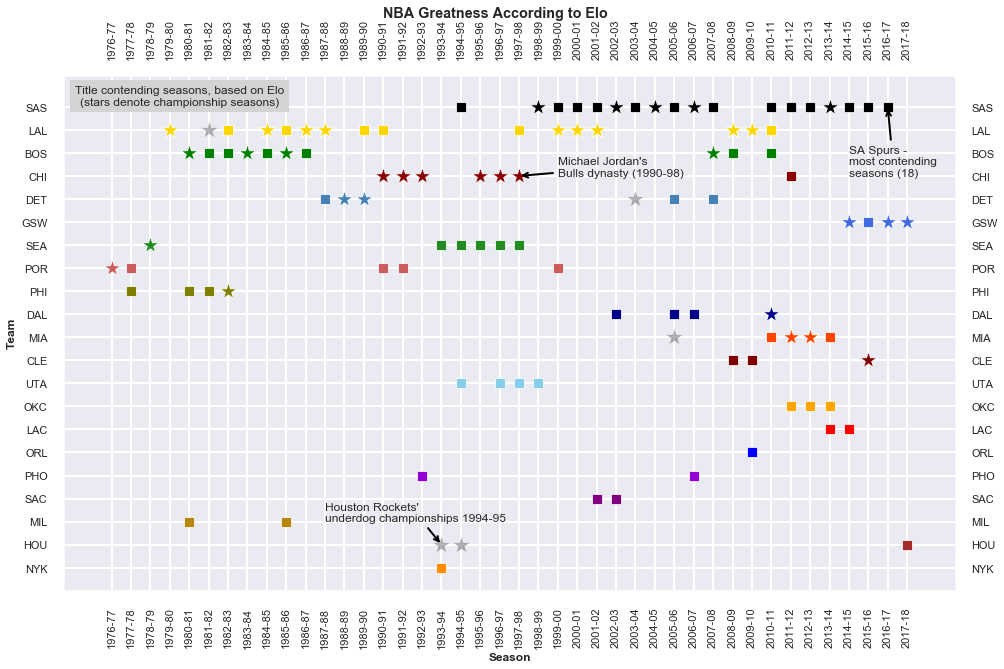

In [876]:
# Modern era title contenders per-team-per-season Elo (based on average OR end-of-season top Elo)
df_title_contenders = df_nba_team_elo[df_nba_team_elo['season'].isin(nba_modern_era_seasons)].groupby(
    ['season', 'team']).mean().query('elo_post >= {}'.format(title_contender_min_elo))
df_title_contenders = df_title_contenders.reset_index()[['season', 'team']].append(
    df_seasons_elo[['season', 'eos_top_elo_team']].rename(columns={'eos_top_elo_team': 'team'}))
df_title_contenders.drop_duplicates(inplace=True)

# Plot

fig, ax = plt.subplots(figsize=(16, 9.5))

sns.scatterplot(nba_modern_era_seasons, y=-100) # scale for season labels

team_colors = {'SAS': 'black', 'LAL': 'gold', 'BOS': 'green',
              'CHI': 'darkred', 'DET': 'steelblue', 'GSW': 'royalblue',
              'SEA': 'forestgreen', 'POR': 'indianred', 'PHI': 'olive',
              'DAL': 'darkblue', 'MIA': 'orangered', 'CLE': 'maroon',
              'UTA': 'skyblue', 'OKC': 'orange', 'LAC': 'red',
              'ORL': 'blue', 'PHO': 'darkviolet', 'SAC': 'purple',
              'MIL': 'darkgoldenrod', 'HOU': 'brown', 'NYK': 'darkorange',
              'ATL': 'red', 'NJN': 'darkblue'} # custom colors for this chart

# top 10 teams by season count
for team, v in df_title_contenders.groupby(
    'team').size().sort_values(ascending=False)[::-1].iteritems():
    
    df_title_seasons = df_title_contenders[
        df_title_contenders['team'] == team].reset_index().astype('str')
    
    champ_seasons = list(df_seasons_elo[df_seasons_elo['champion'] == team]['season'].astype('str'))

    # title contending seasons
    sns.scatterplot(data = df_title_seasons[
        df_title_seasons['season'].isin(champ_seasons) == False],
                    x='season', y='team', marker='s', s=100, color=team_colors[team], ax=ax)
    
    # title contending seasons (marking championship seasons)
    sns.scatterplot(data = df_title_seasons[
        df_title_seasons['season'].isin(champ_seasons)],
                    x='season', y='team', marker='*', s=300, color=team_colors[team], ax=ax)
    
    # note outlier championships (non-title contenders)
    other_champ_seasons = list(set(champ_seasons).difference(df_title_seasons['season']))
    if len(other_champ_seasons) > 0:
        sns.scatterplot(x = other_champ_seasons, y = np.full(len(other_champ_seasons), team),
                    marker='*', s=300, alpha=.3, color='black', ax=ax)
    
# Style
plt.ylabel('Team', fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.suptitle('NBA Greatness According to Elo', fontweight='bold')
plt.title('Title contending seasons, based on Elo'+
          '\n(stars denote championship seasons)',
          x=0.13, y=.93, backgroundcolor='lightgrey') # move title to conserve space
ax.tick_params(labeltop='on', labelright='on')
plt.xticks(rotation='vertical')
ax.set_xticklabels(nba_modern_era_season_labels);
ax.annotate('SA Spurs -\nmost contending\nseasons (18)',
            xy=('2017', 'SAS'), xytext=('2015','CHI'),
           arrowprops=dict(color='black', arrowstyle='->'))
ax.annotate('Houston Rockets\'\nunderdog championships 1994-95',
            xy=('1994', 'HOU'), xytext=('1988','MIL'),
            arrowprops=dict(color='black', arrowstyle='->'));
ax.annotate('Michael Jordan\'s\n'+
            'Bulls dynasty (1990-98)',
            xy=('1998', 'CHI'), xytext=('2000','CHI'),
            arrowprops=dict(color='black', arrowstyle='->'));

## Win Streaks by-the-Elo

Much is also made about win streaks as historical proof of a team's greatness. Assessing the change in Elo rating over various win streaks shows that:
- <img src="lbj.png" align="right" style="padding-left: 10px; width: 264px; display: inline;"/>The greatest streaks are not necessarily the longest. Looking at the Elo trend for each streak suggests a "grinding" nature for some (low Elo/game) and "hot" streaks for others (high Elo/game).
- Unsurprisingly, many teams that rank as title contenders also have long winning streaks. Streaks by non-contenders tend to be shorter and "hotter."
- Many analysts used the Warriors' (GSW) 24-game win streak in 2015-16 as a benchmark against the great 2012-13 Heat (MIA), whose 27-game streak is the longest in the modern era. We can see that they are similar in terms of Elo/game, although the Warriors failed to win a championship that year!

Note that this list excludes the longest streak in history, by the Lakers in 1972 (before the modern era). That streak included 33 games and an increase of 208(!) Elo.

<sub>[chart in sub-slide &#9660;]</sub>

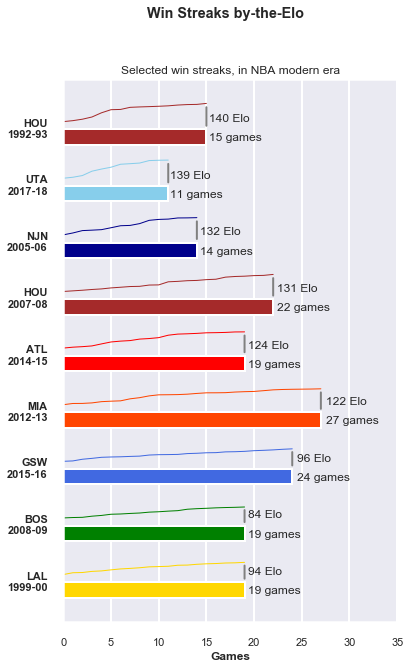

In [873]:
#Select top 5 streaks based on Elo delta, length
df_streaks_elo_selected = df_streaks_elo[df_streaks_elo['season'].isin(nba_modern_era_seasons)]
df_streaks_elo_selected = df_streaks_elo_selected.sort_values('elo_delta', ascending=False)[:5].append(
    df_streaks_elo_selected.sort_values('streak_count', ascending=False)[:5]).drop_duplicates().reset_index()

# Plot

fig, ax = plt.subplots(figsize=(6, 10))

y_tick_labels = [] # labels for streaks
y_tick_locs = []   # locations for labels

bar_width = (
    df_streaks_elo_selected['elo_delta'].sum() /
    len(df_streaks_elo_selected))                    # width of count bars
y_loc = 0                                            # location to graph streak data
y_delta = df_streaks_elo_selected['elo_delta'].max() # delta to increment y locations

# each streak
for idx, row in df_streaks_elo_selected.sort_index(ascending=False).iterrows():
    
    # build label
    this_season_label = [s for s in nba_modern_era_season_labels if s[-2:] == row['season'][-2:]][0]
    y_tick_labels.append('{}\n{}'.format(row['team'], this_season_label))
    y_tick_locs.append(y_loc +  y_delta / 2)
    
    # streak count bar
    plt.barh(y_loc, row['streak_count'], height=bar_width, color=team_colors[row['team']])
    ax.annotate('{} games'.format(row['streak_count']), xy=(row['streak_count'], y_loc),
                xytext=(row['streak_count']*1.02, y_loc - bar_width*.25))
    
    y_loc += bar_width # location to graph Elo delta plot
    
    # streak Elo delta plot
    df_streak_elo = df_nba_team_elo.query('team == "{}" and date >= "{}" and date <= "{}"'.format(
        row['team'], row['start_date'], row['end_date']))
    streak_elo = df_streak_elo['elo_pre'].tolist() + [df_streak_elo['elo_post'].iloc[-1]]
    streak_elo = [n - streak_elo[0] for n in streak_elo]
    plt.plot(streak_elo + y_loc, linewidth=1, color=team_colors[row['team']])
    ax.annotate('{} Elo'.format(int(np.round(row['elo_delta']))), xy=(row['streak_count'], y_loc),
                xytext=(row['streak_count']*1.02, y_loc))
    ax.annotate('', xy=(row['streak_count'], y_loc - bar_width * .4), xytext=(row['streak_count'],
                y_loc + streak_elo[-1] * .9), arrowprops=dict(color='grey', arrowstyle='-'))
    
    y_loc += bar_width * 1.5 + y_delta # location to graph next streak data

# Style
plt.xlim(0, df_streaks_elo_selected['streak_count'].max() * 1.3)
plt.yticks(y_tick_locs, y_tick_labels, fontweight='bold');
plt.xlabel('Games', fontweight='bold')
plt.suptitle('Win Streaks by-the-Elo', fontweight='bold')
plt.title('Selected win streaks, in NBA modern era')
ax.yaxis.grid(False)